In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import datetime
from matplotlib import pyplot as plt
pd.set_option("display.max_columns", 200)
pd.set_option("display.max_rows", 400)
pd.set_option("display.max_colwidth", -1) # -1 for all of it

/tmp/ipykernel_557713/1480787089.py:8: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option("display.max_colwidth", -1) # -1 for all of it


In [5]:
kl = pd.read_feather("politicians.feather")
kl["name"] = kl["first_name"] + " " + kl["last_name"]
kl = kl[["id", "name"]]
#kl.head(1)

In [113]:
df = pd.read_feather("germaparl.feather")
df["id"] = df["date"]+"_"+df["agenda_no"]
print(df.shape)
#df.head(1)

(129464, 16)


In [114]:
df.columns

Index(['name', 'position', 'party', 'role', 'group', 'who', 'speech',
       'agenda_no', 'agenda_type', 'description_agenda', 'title',
       'electoral_term', 'session', 'date', 'url', 'id'],
      dtype='object')

In [7]:
df["role"].value_counts()

presidency                    58749
mp                            57445
government                    13154
misc                          59   
federal_council               37   
parliamentary_commissioner    20   
Name: role, dtype: int64

In [178]:
dfg = df
dfg["date"] = pd.to_datetime(dfg["date"])

In [51]:
dfg.loc[dfg["speech"].str.contains("Energiewende|Solar|rneuerbar")].shape

(2812, 15)

In [179]:
#dfg.loc[dfg["speech"].str.contains("Energiewende")].groupby("date").agg({"agenda_no": ["count", "min", "max"]})
l = dfg.loc[dfg["speech"].str.contains("nergiewende|Solar|rneuerbar|indkraft", case=False)]
lg = l.groupby(["date","agenda_no"]).agg({"session": ["count"]})

In [183]:
lg.head()

session
                       count
date       agenda_no        
2013-10-22 1          1     
2013-11-18 1          1     
           2          1     
2013-11-28 10         1     
           6          7

In [184]:
kg = lg[lg["session"]["count"]>3]
#kg.head(3)
kg.shape

(257, 1)

In [185]:
kg["session"]["count"].sum()

2052

In [186]:
#kg.plot.bar()

In [187]:
kg.columns = ['_'.join(col) for col in kg.columns.values]
kg = kg.reset_index()
kg["id"] = kg["date"].dt.strftime('%Y-%m-%d')+"_"+kg["agenda_no"]

In [192]:
df[(df["id"].isin(kg["id"].to_list())) & (df["role"] == "mp")][["name","id", "role"]].shape

(5926, 3)

In [193]:
l[(l["id"].isin(kg["id"].to_list()))][["name","id", "role"]].shape

(2052, 3)

In [32]:
dfg.loc[[52686]].speech_content

52686    \n\nHerr Bundespräsident! Verehrte Kolleginnen und Kollegen!\n\n({0})\n\n– Muss ich selber drücken?\n\n({1})\n\nAller Anfang ist schwer; also fangen wir noch einmal von vorne an.\n\nHerr Bundespräsident! Liebe Kolleginnen und Kollegen! Meine sehr verehrten Damen und Herren! Ich habe zunächst zu danken. Ich danke Ihnen für das Vertrauen, das Sie mir mit der Wahl zum Bundestagspräsidenten entgegenbringen. Ich danke Hermann Otto Solms. Mit seiner langen parlamentarischen Erfahrung hat er die von mir übernommene Aufgabe, diesen 19. Deutschen Bundestag als dienstältester Abgeordneter zu eröffnen, mit großer Umsicht wahrgenommen. Und er hat die Herausforderungen für unser Parlament klar umrissen.\n\nIch möchte den vielen ausgeschiedenen Kolleginnen und Kollegen danken. Sie schauen zum Teil auf jahrzehntelanges parlamentarisches Wirken zurück. Ich nenne stellvertretend Heinz Riesenhuber. Er war gleich zweimal Alterspräsident, bei den konstituierenden Sitzungen der beiden zurückliegen

In [351]:
dfq = df[df['speech'].str.contains("Energiewende")] 
len(dfq)

1584

In [352]:
dfq["party"].value_counts()

SPD           446
CDU           314
GRUENE        292
DIE LINKE     167
AfD           158
CSU           119
FDP           63 
parteilos     11 
LKR           7  
LINKE         5  
Die PARTEI    1  
NA            1  
Name: party, dtype: int64

In [61]:
#dfq.groupby(['date'])["date"].size()

In [62]:
from IPython.core.display import HTML

showdf = df[df['date'] == datetime.date(2022, 4, 28)][["speech_content", "date", "session", "faction_id"]]
#display(HTML(showdf.to_html()))

In [ ]:
speeches = dfq["speech_content"].to_list()

In [73]:
from bertopic import BERTopic
from bertopic.representation import KeyBERTInspired

# Create your representation model
representation_model = KeyBERTInspired()

topic_model = BERTopic(representation_model=representation_model, language = "multilingual", nr_topics=35)

In [74]:
topics, probs = topic_model.fit_transform(speeches)

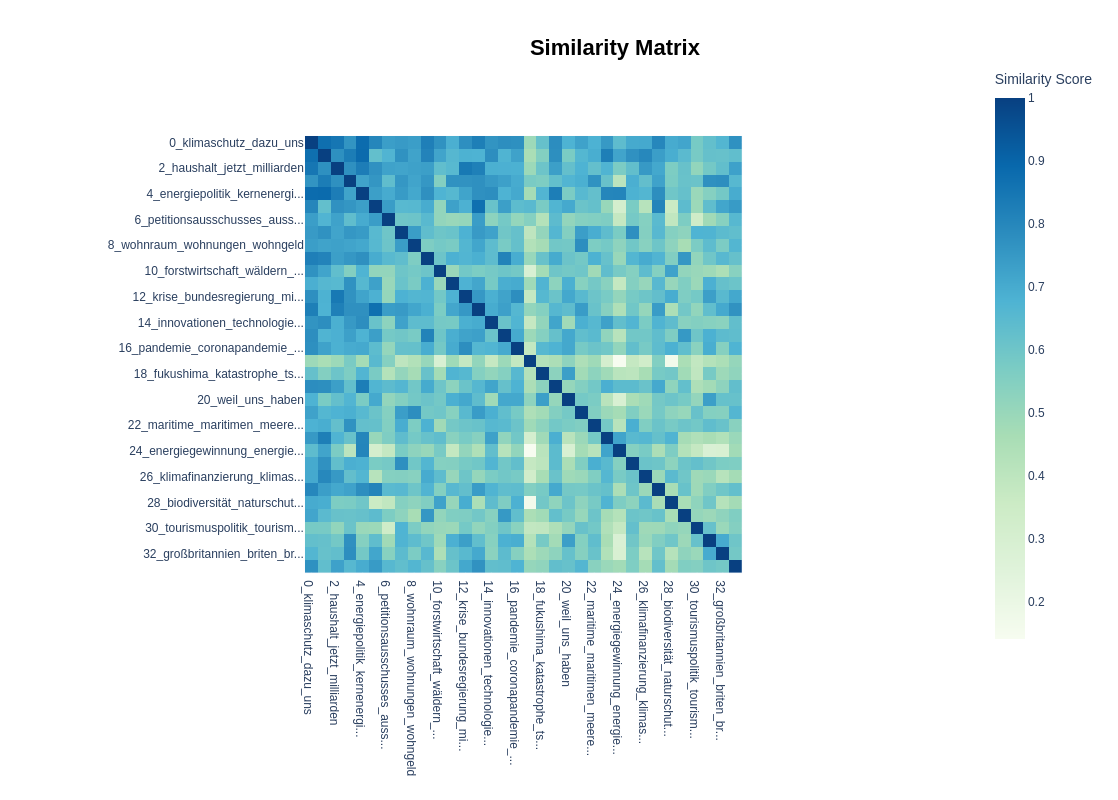

In [75]:
topic_model.visualize_heatmap()

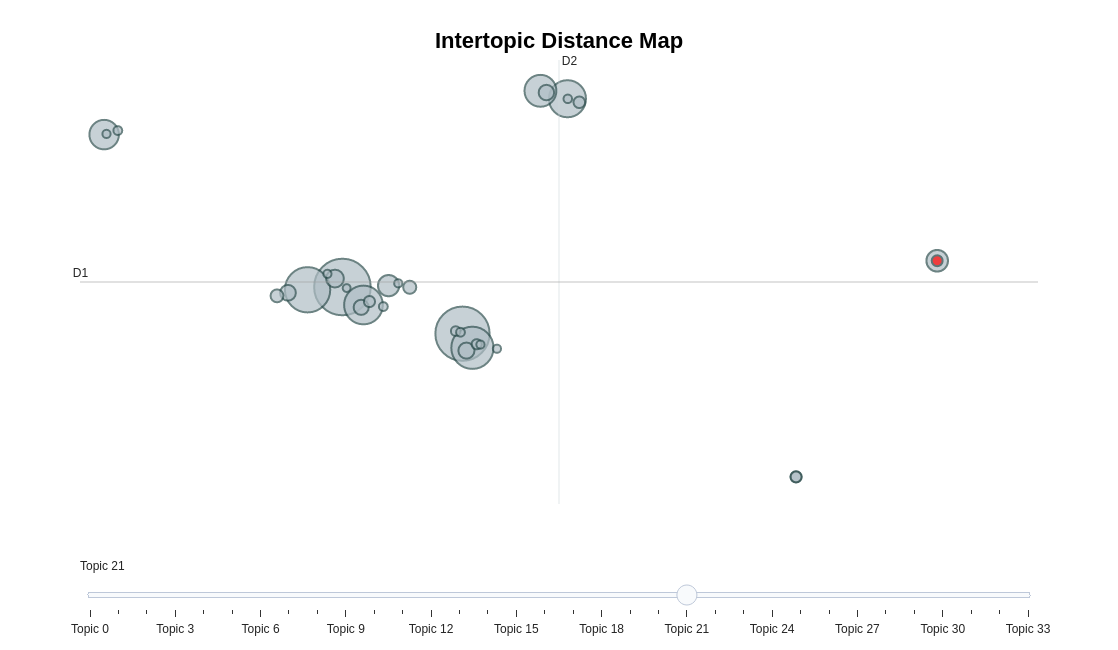

In [76]:
topic_model.visualize_topics()

In [77]:
topic_model.save("klimaschutz", serialization="pickle")

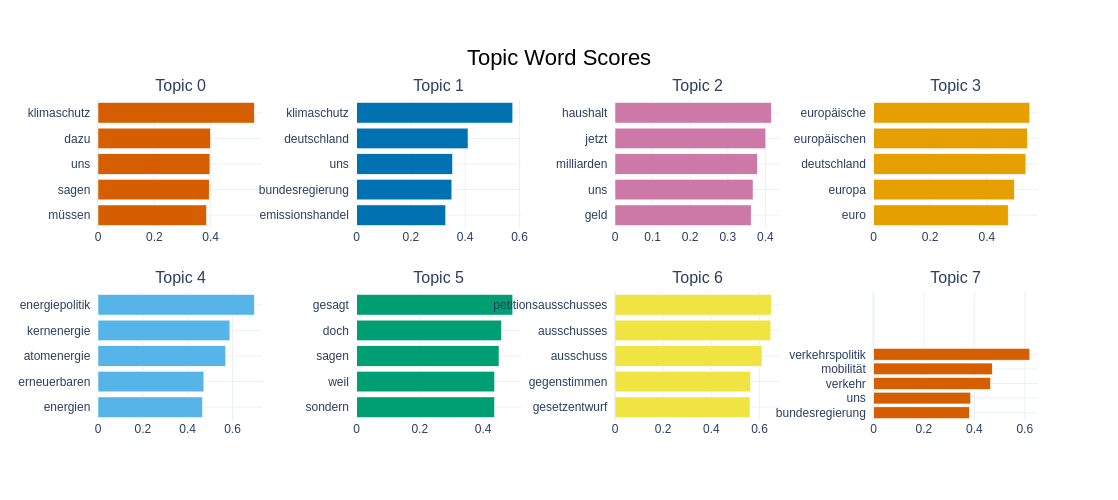

In [78]:
topic_model.visualize_barchart()

In [80]:
dftm = pd.DataFrame({"Document": speeches, "Topic": topic_model.topics_})

In [98]:
x = dftm[dftm["Topic"] == 8]
len(x)

90

In [105]:
docs = x.Document.to_list()

In [106]:
representation_model = KeyBERTInspired()

topic_model = BERTopic(representation_model=representation_model, language = "multilingual", nr_topics=15)
topics, probs = topic_model.fit_transform(docs)

In [112]:
pd.DataFrame({"Document": texts, "Topic": topic_model.topics_})["Topic"].value_counts()

Topic
 1    50
 0    39
-1     1
Name: count, dtype: int64

In [11]:
#topic_model.visualize_topics()